# **IMPORTING THE DATASET**

In [1]:
import pandas as pd
import nltk
import pandas as pd 
import re
import string
import nltk        
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/complaints_processed.csv")
df

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...
...,...,...,...
162416,162416,debt_collection,name
162417,162417,credit_card,name
162418,162418,debt_collection,name
162419,162419,credit_card,name


# **Pre-Processing**

In [4]:
df.isna().sum()

Unnamed: 0     0
product        0
narrative     10
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df['product'].unique()

array(['credit_card', 'retail_banking', 'credit_reporting',
       'mortgages_and_loans', 'debt_collection'], dtype=object)

In [7]:
df['product'].value_counts(normalize=True)*100

credit_reporting       56.136592
debt_collection        14.252729
mortgages_and_loans    11.692558
credit_card             9.584326
retail_banking          8.333795
Name: product, dtype: float64

# **Visualizing the Class Label Distribution**

<Axes: ylabel='product'>

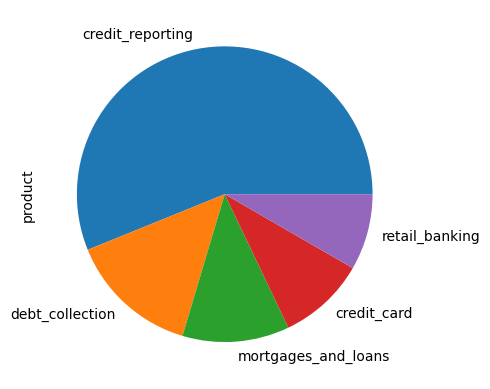

In [8]:
df['product'].value_counts().plot(kind='pie')

In [9]:
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

ps = PorterStemmer()
wordnet = WordNetLemmatizer()
from nltk.tokenize import TweetTokenizer 
import string

In [11]:
all_stopwords = stopwords.words('english')

def preprocessing(data):
    corpus = []
    
    review = data.lower() # casefolding
    review = review.split() 
    lemma= WordNetLemmatizer() # lemmatization
    review = [lemma.lemmatize(word) for word in review if word not in all_stopwords]
    review = ' '.join(review)
    corpus.append(review)
    return corpus

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()
y = le.fit_transform(df['product'])


In [14]:
codes =  list(le.inverse_transform(range(5)))


import itertools as it
for encoding in zip(le.classes_, it.count()):
    print(f'{encoding[0]} encoded as : {encoding[1]}')

credit_card encoded as : 0
credit_reporting encoded as : 1
debt_collection encoded as : 2
mortgages_and_loans encoded as : 3
retail_banking encoded as : 4


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report


# **Vectorization**

In [16]:
tfidf = TfidfVectorizer(min_df = 1, stop_words='english',analyzer=preprocessing)

X_tfidf = tfidf.fit_transform(df['narrative'])



/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [17]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['product'], test_size=0.2, random_state=42)

# **LOGISTIC REGRESSION**

In [ ]:
log = LogisticRegression()
log.fit(X_train,y_train)

In [19]:
ypred_log = log.predict(X_test)

In [ ]:
log_accuracy = accuracy_score(y_test, ypred_log)

In [21]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# **Support Vector Classifier**

In [25]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

# **MultinomialNB**

In [26]:
nb = MultinomialNB()
nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)

# **DecisionTreeClassifier**

In [27]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print('Decision Tree accuracy:', dt_accuracy)

In [28]:
print("ACCURACY OF LogisticRegression ",log_accuracy)
print("ACCURACY OF SupportVector ",svm_accuracy)
print("ACCURACY OF MultinomialNB ",nb_accuracy)
print("ACCURACY OF DecisionTreeClassifier ",dt_accuracy)


ACCURACY OF LogisticRegression  0.57
ACCURACY OF SupportVector  0.83
ACCURACY OF MultinomialNB  0.80
ACCURACY OF DecisionTreeClassifier  79
